<h1 style="color: red; text-align:center">Bulletin of the Society for the Encouragement of National Industry</h1>
<hr>
<h3>❖ Authors:</h3>
<p>IZMOUH Maryam<br>TATI Mohammed</p>
<p style="text-align: right;"><b>11-JUN | <span style="color: green;">2023</span></b></p>

<h2 style="color: green">Importing libraries needed</h2>

In [1]:
# Data manipilation
import pandas as pd

# Scrapping tool
from bs4 import BeautifulSoup
from lxml import etree

# progress bar
from tqdm import tqdm

# To get the HTTP requests
import requests

# To make sure we are scrapping the right data
import re 

<h2 style="color: green">Data Scraping</h2>

In [2]:
def scraper():
    # DataFrame
    data = {"id": [], "year": [], "article": [], "theme": []}
    
    # Initialize the progress bar once
    total_iterations = 115
    progress_bar = tqdm(total=total_iterations, desc='Progress', unit='iteration')
    
    # Counter
    count = 0
    
    for i in range(1, 116):
        progress_bar.update(1)
        # HTML Page to scrap (1802-1910)
        html = requests.get(f"https://cnum.cnam.fr/pgi/redir.php?onglet=d&ident=BSPI.{i}").text
        
        # Parsing the HTML
        soup = BeautifulSoup(html, "html.parser")
        dom = etree.HTML(str(soup))
        
        # Getting the <span> tags that containes the data needed
        spans = soup.find_all('span', class_='row-label with-list2')
        
        for span in spans:
            # getting the list of articales
            for u in span.find_next_sibling('ul'):

                a_tags = u.find_all('a')

                for a in a_tags:
                    count += 1
                    # Record Id
                    record_id = "IT"+"{:06d}".format(count)
                    data["id"].append(record_id)
                    
                    # Year
                    year = dom.xpath('/html/body/div[1]/div/div[2]/ul/li[4]/text()')[0]
                    data['year'].append(year)
                    
                    # Article
                    data["article"].append(a.text)
                    
                    # Theme
                    data["theme"].append(span.text)
            
    return data

<h3>Generating the data</h3>

In [3]:
df = pd.DataFrame(scraper())

Progress: 100%|████████████████████████| 115/115 [04:14<00:00,  2.21s/iteration]


In [0]:
# Saving the data as CSV fo further precessing
df.to_csv('data.csv', index=False)

<h2 style="color: green">Data Cleaning Using Spark</h2>

In [0]:
%sql
select * from hive_metastore.default.data;  

id year article theme IT000001  > 1802. An XI [1802]. 1e année EXTRAIT des procès-verbaux des séances du Conseil (p.5) CONSEIL D'ADMINISTRATION (p.5) IT000002  > 1802. An XI [1802]. 1e année PROGRAMMES des prix proposés parla Société (p.6) CONSEIL D'ADMINISTRATION (p.5) IT000003  > 1802. An XI [1802]. 1e année EXTRAIT d'un rapport fait à la Société d Encouragement, au nom du Comité des arts mécaniques, par le C. Molard, sur les machines a filer la soie (p.7) ARTS MÉCANIQUES (p.7) IT000004  > 1802. An XI [1802]. 1e année PROCÉDÉ pour presser et former les chapeaux de paille (p.8) ARTS MÉCANIQUES (p.7) IT000005  > 1802. An XI [1802]. 1e année RAPPORT fait , au nom du Comité des arts mécaniques , sur la proposition du C. relative a un nouveau genre de construction, navale (p.11) ARTS MÉCANIQUES (p.7) IT000006  > 1802. An XI [1802]. 1e année RAPPORT fait par le C. Conte, au nom du Comité des arts chimiques sur les peaux et taffetas vernis du C'. Meullersten (p.14) ARTS CHIMIQUES (p.14) IT000007  > 1802. An XI [1802]. 1e année SUR l'éducation des bêtes à laine fine de race espagnole (p.15) AGRICULTURE (p.15) IT000008  > 1802. An XI [1802]. 1e année Rats des champs (p.17) AGRICULTURE (p.15) IT000009  > 1802. An XI [1802]. 1e année Arachide (p.18) AGRICULTURE (p.15) IT000010  > 1802. An XI [1802]. 1e année TRAITÊ des constructions rurales, dans lequel on apprend la manière de construire, d'ordonner et de distribuer les habitations des champs, les chaumières, les logement pour les bestiaux, les granges, établis, écuries et autres batimens nécessaires aï exploitation des terres et h une basse-cour[...] (p.18) AGRICULTURE (p.15) IT000011  > 1802. An XI [1802]. 1e année ANALYSE du programme d'un prix proposé par la Société libre d'agriculture, commerce et arts du département de la Drôme (p.19) AGRICULTURE (p.15) IT000012  > 1802. An XI [1802]. 1e année NOUVEAU fourneau économique et portatif construit par le C. Voyenne, poêlier-mécanicien, rue de la Harpe, n° 155, à Paris (p.21) ÉCONOMIE DOMESTIQUE (p.21) IT000013  > 1802. An XI [1802]. 1e année Extrait du rapport fait par le Comité des arts économiques au Conseil d'administration de la Société d'Encouragement (p.21) ÉCONOMIE DOMESTIQUE (p.21) IT000014  > 1802. An XI [1802]. 1e année NOTICE sur une fontaine propre à conserver de l'eau chaude pendant longtemps (p.22) ÉCONOMIE DOMESTIQUE (p.21) IT000015  > 1802. An XI [1802]. 1e année Fourneaux économiques (p.23) ÉCONOMIE DOMESTIQUE (p.21) IT000016  > 1802. An XI [1802]. 1e année TABLEAU des principaux objets donnés à la Société (p.23) ÉCONOMIE DOMESTIQUE (p.21) IT000017  > 1802. An XI [1802]. 1e année OUVRAGES périodiques nationaux et étrangers, sur les diverses branches de l'industrie, auxquels la Société est abonnée, et que ses membres peuvent consulter (p.24) ÉCONOMIE DOMESTIQUE (p.21) IT000018  > 1802. An XI [1802]. 1e année LIVRES principaux offerts a la Société, sur les arts utiles (p.24) ÉCONOMIE DOMESTIQUE (p.21) IT000019  > 1802. An XI [1802]. 1e année EXTRAIT de rassemblée générale du 9 messidor an X (p.25) CONSEIL D'ADMINISTRATION (p.25) IT000020  > 1802. An XI [1802]. 1e année Pour la Commission des fonds, les CC (p.27) CONSEIL D'ADMINISTRATION (p.25) IT000021  > 1802. An XI [1802]. 1e année Pour les Arts mécaniques, les CC (p.27) CONSEIL D'ADMINISTRATION (p.25) IT000022  > 1802. An XI [1802]. 1e année Pour les Arts chimiques, les CC (p.27) CONSEIL D'ADMINISTRATION (p.25) IT000023  > 1802. An XI [1802]. 1e année Pour l'Agriculture, les CC (p.27) CONSEIL D'ADMINISTRATION (p.25) IT000024  > 1802. An XI [1802]. 1e année Pour les Arts économiques, les CC (p.27) CONSEIL D'ADMINISTRATION (p.25) IT000025  > 1802. An XI [1802]. 1e année Pour le Commerce, les CC (p.27) CONSEIL D'ADMINISTRATION (p.25) IT000026  > 1802. An XI [1802]. 1e année EXTRAIT du compte rendu à l'assemblée générale des membres de la Société d'Encouragement, le 9 messidor an X, en exécution du titre IV du règlement (p.28) CONSEIL D'ADMINISTRATION (p.25) IT000027  >

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, desc, when
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Read the CSV file into a DataFrame
data = _sqldf
print("Setup Comptele!")

Setup Comptele!


In [0]:
# Define the cleaning function as a UDF (User-Defined Function)
def cleaning(x):
    x = x.strip()
    x = x.split('(')[0]
    x = x.strip()
    return x.lower()

# Register the cleaning function as a UDF
cleaning_udf = udf(cleaning, StringType())

# Define the year_cleaning function as a UDF (User-Defined Function)
def year_cleaning(x):
    r = x.strip()
    r = r.split('>')[1]
    r = r.split('.')[0]
    r = r.strip()
    
    return r

# Register the year_cleaning function as a UDF
year_cleaning_udf = udf(year_cleaning, StringType())

def theme_cleaning(x):    
    if len(x) == 1:
        return None
    
    return x.lower()

# Register the year_cleaning function as a UDF
theme_cleaning_udf = udf(theme_cleaning, StringType())

def clean_phase1(data):
    # Drop rows with missing values
    data = data.na.drop()
    
    # Apply the cleaning function to the 'theme' column and assign the result to a new column
    data = data.withColumn('theme', cleaning_udf(data['theme']))
    data = data.withColumn('article', cleaning_udf(data['article']))
    data = data.withColumn('year', year_cleaning_udf(data['year']))
    data = data.withColumn('theme', theme_cleaning_udf(data['theme']))

    # Drop rows with missing values
    data = data.na.drop()
    
    data = data.filter(~col('article').like('%prix%'))
    data = data.filter(~col('theme').like('%prix%'))
    data = data.filter(~col('theme').like('%programme%'))
    return data

In [0]:
# Apply the clean_phase1 function to the data DataFrame
cleaned_data = clean_phase1(data)

# Show the cleaned data
cleaned_data.show()

+--------+----+--------------------+--------------------+
|      id|year|             article|               theme|
+--------+----+--------------------+--------------------+
|IT000001|1802|extrait des procè...|conseil d'adminis...|
|IT000003|1802|extrait d'un rapp...|     arts mécaniques|
|IT000004|1802|procédé pour pres...|     arts mécaniques|
|IT000005|1802|rapport fait , au...|     arts mécaniques|
|IT000006|1802|rapport fait par ...|      arts chimiques|
|IT000007|1802|sur l'éducation d...|         agriculture|
|IT000008|1802|     rats des champs|         agriculture|
|IT000009|1802|            arachide|         agriculture|
|IT000010|1802|traitê des constr...|         agriculture|
|IT000012|1802|nouveau fourneau ...| économie domestique|
|IT000013|1802|extrait du rappor...| économie domestique|
|IT000014|1802|notice sur une fo...| économie domestique|
|IT000015|1802|fourneaux économi...| économie domestique|
|IT000016|1802|tableau des princ...| économie domestique|
|IT000017|1802

In [0]:
cleaned_data.count()

Out[9]: 47241

In [0]:
# Create a new column with replaced values
df = cleaned_data.withColumn("theme", when(col("theme").like("%physique%") |
                                      col("theme").like("%mécanique%") |
                                      col("theme").like("%mecanique%") |
                                      col("theme").like("%électricité%") |
                                      col("theme").like("%arts physiques%") |
                                      col("theme").like("%machines-outils%") |
                                      col("theme").like("%horlogerie%") |
                                      col("theme").like("%méganiques%") |
                                      col("theme").like("%metallurgie%") |
                                      col("theme").like("%métallurgie%") |     
                                      col("theme").like("%méc.anique%"), "arts mécaniques")
                                 .otherwise(col("theme")))

# Create a new column with replaced values
df = df.withColumn("theme", when(col("theme").like("%combustibles%") |
                                      col("theme").like("%chimi%") |
                                      col("theme").like("%chemins de fer%"), "arts chimiques")
                                 .otherwise(col("theme")))


# Create a new column with replaced values
df = df.withColumn("theme", when(col("theme").like("%conseil%"), "conseil d'administration")
                                 .otherwise(col("theme")))

# Create a new column with replaced values
df = df.withColumn("theme", when(col("theme").like("%industrie%") |
                                 col("theme").like("%céramique%")|
                                 col("theme").like("%constructions%") 
                                 , "industriel")
                                 .otherwise(col("theme")))

# Create a new column with replaced values
df = df.withColumn("theme", when(col("theme").like("%commerce%") |
                                 col("theme").like("%économi%") |
                                 col("theme").like("%financier%") |
                                 col("theme").like("%economi%") 
                                 , "arts économiques")
                                 .otherwise(col("theme")))

# Create a new column with replaced values
df = df.withColumn("theme", when(col("theme").like("%engrais%") |
                                      col("theme").like("%sériciculture%") |
                                      col("theme").like("%viticulture%") |
                                 col("theme").like("%agriculture%") |
                                      col("theme").like("%agronomie%"), "agriculture")
                                 .otherwise(col("theme")))

# Create a new column with replaced values
df = df.withColumn("theme", when(col("theme").like("%bibliographie%"), "bibliographie")
                                 .otherwise(col("theme")))

In [0]:
group_by = df.groupBy('theme').count().orderBy(desc("count"))

In [0]:
group_by.show(100)

+--------------------+-----+
|               theme|count|
+--------------------+-----+
|     arts mécaniques|14817|
|          industriel| 6448|
|      arts chimiques| 5371|
|    arts économiques| 4102|
|conseil d'adminis...| 3962|
|         agriculture| 2315|
|       bibliographie| 1167|
|procès-verbaux de...|  512|
|           médailles|  471|
|              marine|  423|
|exposition univer...|  368|
|distribution des ...|  363|
|   ouvrages nouveaux|  236|
|exposition univer...|  231|
|médailles d'encou...|  218|
|             hygiène|  199|
|          nécrologie|  195|
|          métrologie|  157|
|distribution des ...|  150|
|            aviation|  113|
|exposition univer...|  111|
|statistique de la...|  111|
|       art des mines|  103|
|            mémoires|   97|
|          biographie|   95|
|      correspondance|   92|
|exposition de vienne|   91|
|pièces justificat...|   91|
|         pyrotechnie|   86|
|     travaux publics|   84|
|                    |   82|
|statistique c

In [0]:
filtered_data = group_by.filter(group_by['count'] >= 100)

In [0]:
filtered_data.show()

+--------------------+-----+
|               theme|count|
+--------------------+-----+
|     arts mécaniques|14817|
|          industriel| 6448|
|      arts chimiques| 5371|
|    arts économiques| 4102|
|conseil d'adminis...| 3962|
|         agriculture| 2315|
|       bibliographie| 1167|
|procès-verbaux de...|  512|
|           médailles|  471|
|              marine|  423|
|exposition univer...|  368|
|distribution des ...|  363|
|   ouvrages nouveaux|  236|
|exposition univer...|  231|
|médailles d'encou...|  218|
|             hygiène|  199|
|          nécrologie|  195|
|          métrologie|  157|
|distribution des ...|  150|
|            aviation|  113|
+--------------------+-----+
only showing top 20 rows



In [0]:
themes = filtered_data.select('theme').rdd.flatMap(lambda x: x).collect()

In [0]:
type(themes)

In [0]:
# Assuming the given DataFrame is named 'df' and the other DataFrame is named 'other_df'

origin_data = df.filter(col("theme").isin(themes))

origin_data.show()

+--------+----+--------------------+--------------------+
|      id|year|             article|               theme|
+--------+----+--------------------+--------------------+
|IT000001|1802|extrait des procè...|conseil d'adminis...|
|IT000003|1802|extrait d'un rapp...|     arts mécaniques|
|IT000004|1802|procédé pour pres...|     arts mécaniques|
|IT000005|1802|rapport fait , au...|     arts mécaniques|
|IT000006|1802|rapport fait par ...|      arts chimiques|
|IT000007|1802|sur l'éducation d...|         agriculture|
|IT000008|1802|     rats des champs|         agriculture|
|IT000009|1802|            arachide|         agriculture|
|IT000010|1802|traitê des constr...|         agriculture|
|IT000012|1802|nouveau fourneau ...|    arts économiques|
|IT000013|1802|extrait du rappor...|    arts économiques|
|IT000014|1802|notice sur une fo...|    arts économiques|
|IT000015|1802|fourneaux économi...|    arts économiques|
|IT000016|1802|tableau des princ...|    arts économiques|
|IT000017|1802

In [0]:
unique_names = origin_data.select("theme").distinct()

# Show the unique names
unique_names.show()

+--------------------+
|               theme|
+--------------------+
|    arts économiques|
|          nécrologie|
|exposition univer...|
|   ouvrages nouveaux|
|      arts chimiques|
|          métrologie|
|         agriculture|
|              marine|
|exposition univer...|
|     arts mécaniques|
|exposition univer...|
|       art des mines|
|conseil d'adminis...|
|           médailles|
|          industriel|
|statistique de la...|
|médailles d'encou...|
|             hygiène|
|distribution des ...|
|distribution des ...|
+--------------------+
only showing top 20 rows



In [0]:
unique_names.count()

Out[19]: 23

In [0]:
origin_data.count()

Out[21]: 42143

In [0]:
# Save the DataFrame as a Hive table
origin_data.write.saveAsTable("hive_metastore.default.output_data")

<h2>Classification Task</h2>

In [0]:
%sql
select * from hive_metastore.default.output_data;

id year article theme IT000001 1802 extrait des procès-verbaux des séances du conseil conseil d'administration IT000003 1802 extrait d'un rapport fait à la société d encouragement, au nom du comité des arts mécaniques, par le c. molard, sur les machines a filer la soie arts mécaniques IT000004 1802 procédé pour presser et former les chapeaux de paille arts mécaniques IT000005 1802 rapport fait , au nom du comité des arts mécaniques , sur la proposition du c. relative a un nouveau genre de construction, navale arts mécaniques IT000006 1802 rapport fait par le c. conte, au nom du comité des arts chimiques sur les peaux et taffetas vernis du c'. meullersten arts chimiques IT000007 1802 sur l'éducation des bêtes à laine fine de race espagnole agriculture IT000008 1802 rats des champs agriculture IT000009 1802 arachide agriculture IT000010 1802 traitê des constructions rurales, dans lequel on apprend la manière de construire, d'ordonner et de distribuer les habitations des champs, les chaumières, les logement pour les bestiaux, les granges, établis, écuries et autres batimens nécessaires aï exploitation des terres et h une basse-cour[...] agriculture IT000012 1802 nouveau fourneau économique et portatif construit par le c. voyenne, poêlier-mécanicien, rue de la harpe, n° 155, à paris arts économiques IT000013 1802 extrait du rapport fait par le comité des arts économiques au conseil d'administration de la société d'encouragement arts économiques IT000014 1802 notice sur une fontaine propre à conserver de l'eau chaude pendant longtemps arts économiques IT000015 1802 fourneaux économiques arts économiques IT000016 1802 tableau des principaux objets donnés à la société arts économiques IT000017 1802 ouvrages périodiques nationaux et étrangers, sur les diverses branches de l'industrie, auxquels la société est abonnée, et que ses membres peuvent consulter arts économiques IT000018 1802 livres principaux offerts a la société, sur les arts utiles arts économiques IT000019 1802 extrait de rassemblée générale du 9 messidor an x conseil d'administration IT000020 1802 pour la commission des fonds, les cc conseil d'administration IT000021 1802 pour les arts mécaniques, les cc conseil d'administration IT000022 1802 pour les arts chimiques, les cc conseil d'administration IT000023 1802 pour l'agriculture, les cc conseil d'administration IT000024 1802 pour les arts économiques, les cc conseil d'administration IT000025 1802 pour le commerce, les cc conseil d'administration IT000026 1802 extrait du compte rendu à l'assemblée générale des membres de la société d'encouragement, le 9 messidor an x, en exécution du titre iv du règlement conseil d'administration IT000027 1802 eeschreibung einer ruder maschine etc. description d'une machine applicable aux vaisseaux de guerre, qui pourrait avantageusement servir dans le calme , à la manière des avirons; proposée par m. braubach, dans l'ouvrage périodique intitulé [...] arts mécaniques IT000028 1802 nouvelle méthode pour dorer le fer arts chimiques IT000029 1802 note sur le rouge a polir ; par le c. fréd. cuvier arts chimiques IT000030 1802 rapport fait par le c. molard sur les pelles et bêches fabriquées par les frères engelvin, à pont-gibaud, département du puy-de-dôme , et dont il existe un dépôt à paris, rue montmartre, n 3, chez le c. barre agriculture IT000034 1802 sur les manufactures d'ébauches de mouvemens de montres arts mécaniques IT000035 1802 sur un instrument destiné à indiquer le titre des pièces dor arts mécaniques IT000036 1802 note sur les limes du c. raoul arts mécaniques IT000037 1802 note sur le plâtre-ciment découvert à boulogne-sur-mer arts chimiques IT000038 1802 rapport sur les nouvelles lampes du c. joly, fait au conseil d'administration de la société d encouragement , par les cc. guyton-morveau, bardel et mérimée arts économiques IT000041 1802 note sur les métiers à bas exposés parmi les produits de l'industrie française , pendant les jours complémentaires de tan x arts mécanique

In [0]:
data = _sqldf
data.show()

+--------+----+--------------------+--------------------+
|      id|year|             article|               theme|
+--------+----+--------------------+--------------------+
|IT000001|1802|extrait des procè...|conseil d'adminis...|
|IT000003|1802|extrait d'un rapp...|     arts mécaniques|
|IT000004|1802|procédé pour pres...|     arts mécaniques|
|IT000005|1802|rapport fait , au...|     arts mécaniques|
|IT000006|1802|rapport fait par ...|      arts chimiques|
|IT000007|1802|sur l'éducation d...|         agriculture|
|IT000008|1802|     rats des champs|         agriculture|
|IT000009|1802|            arachide|         agriculture|
|IT000010|1802|traitê des constr...|         agriculture|
|IT000012|1802|nouveau fourneau ...|    arts économiques|
|IT000013|1802|extrait du rappor...|    arts économiques|
|IT000014|1802|notice sur une fo...|    arts économiques|
|IT000015|1802|fourneaux économi...|    arts économiques|
|IT000016|1802|tableau des princ...|    arts économiques|
|IT000017|1802

In [0]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.ml.feature import CountVectorizer, StringIndexer
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, MultilayerPerceptronClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, Evaluator

def data_preparation(data):
    # Remove irrelevant columns
    data = data.drop("id", "year")

    # Handle missing values
    data = data.na.drop()

    # Remove duplicates
    data = data.dropDuplicates()

    # Tokenize text
    tokenizer = RegexTokenizer(inputCol="article", outputCol="tokens", pattern=r"\W")
    data = tokenizer.transform(data)

    # Remove stopwords
    custom_stopwords = StopWordsRemover.loadDefaultStopWords("french")
    stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="clean_tokens", stopWords=custom_stopwords)
    data = stopwords_remover.transform(data)

    # Create Word2Vec model
    word2Vec = Word2Vec(vectorSize=100, inputCol='clean_tokens', outputCol='embeddings')
    model = word2Vec.fit(data)
    data = model.transform(data)  
    
    # labels
    indexer = StringIndexer(inputCol='theme', outputCol='label')
    index = indexer.fit(data)
    data = index.transform(data)
    data = data.withColumn('label', col('label').cast('integer'))
    
    # Remove irrelevant columns
    data = data.drop("tokens", "article", "clean_tokens", "theme")

    return data


In [0]:
data = data_preparation(data)
data.show()

+--------------------+-----+
|          embeddings|label|
+--------------------+-----+
|[-0.1168406947205...|    4|
|[0.00993136857869...|    2|
|[-0.0022543733133...|    3|
|[-0.0588752850890...|    2|
|[0.02113899899025...|    5|
|[-0.1296595986110...|    0|
|[-0.0168820265680...|    2|
|[-0.0640184443592...|    4|
|[0.0,0.0,0.0,0.0,...|    2|
|[-0.0046440579462...|    0|
|[-0.0459612850099...|    2|
|[-0.0638084095687...|    0|
|[-0.0249059563429...|    3|
|[-0.0020905952454...|    2|
|[-0.0149175603874...|    2|
|[-0.0454251370392...|    0|
|[0.02296326081601...|   14|
|[-0.0333620670717...|    2|
|[-0.0535490322016...|   14|
|[-0.0190738588571...|    0|
+--------------------+-----+
only showing top 20 rows



In [0]:
# Step 1: Data Preparation
data = _sqldf
data = data_preparation(data)

# Step 2: Split the Data
train_data, test_data = data.randomSplit([0.7, 0.3])

# Step 3: Select a Classification Algorithm
lr = LogisticRegression(featuresCol='embeddings', labelCol='label')

# Step 4: Train the Model
model = lr.fit(train_data)

# Step 5: Evaluate the Model
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4699941736259468


<h2>Analysis Task</h2>

In [0]:
data = _sqldf
data.show()

+--------+----+--------------------+--------------------+
|      id|year|             article|               theme|
+--------+----+--------------------+--------------------+
|IT000001|1802|extrait des procè...|conseil d'adminis...|
|IT000003|1802|extrait d'un rapp...|     arts mécaniques|
|IT000004|1802|procédé pour pres...|     arts mécaniques|
|IT000005|1802|rapport fait , au...|     arts mécaniques|
|IT000006|1802|rapport fait par ...|      arts chimiques|
|IT000007|1802|sur l'éducation d...|         agriculture|
|IT000008|1802|     rats des champs|         agriculture|
|IT000009|1802|            arachide|         agriculture|
|IT000010|1802|traitê des constr...|         agriculture|
|IT000012|1802|nouveau fourneau ...|    arts économiques|
|IT000013|1802|extrait du rappor...|    arts économiques|
|IT000014|1802|notice sur une fo...|    arts économiques|
|IT000015|1802|fourneaux économi...|    arts économiques|
|IT000016|1802|tableau des princ...|    arts économiques|
|IT000017|1802

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import desc, rank
from pyspark.sql.window import Window

# Step 1: Group by year and theme, and count the occurrences
grouped_data = data.groupBy('year', 'theme').count()

# Step 2: Rank the themes within each year based on the count
window_spec = Window.partitionBy('year').orderBy(desc('count'))
ranked_data = grouped_data.withColumn('rank', rank().over(window_spec))

# Step 3: Filter the top three themes for each year
filtered_data = ranked_data.filter(ranked_data.rank <= 3)

# Step 4: Convert the filtered data into a DataFrame
df = filtered_data.toPandas()


In [0]:
df.head()

year 
 theme 
 count 
 rank 
 
 
 
 
 0 
 1802 
 arts chimiques 
 33 
 1 
 
 
 1 
 1802 
 arts mécaniques 
 28 
 2 
 
 
 2 
 1802 
 arts économiques 
 20 
 3 
 
 
 3 
 1803 
 arts chimiques 
 45 
 1 
 
 
 4 
 1803 
 arts mécaniques 
 18 
 2

In [0]:
df_1802 = df[df['year'] == '1802']
df_1825 = df[df['year'] == '1825']
df_1850 = df[df['year'] == '1850']
df_1875 = df[df['year'] == '1875']
df_1910 = df[df['year'] == '1910']

In [0]:
statics_df = pd.concat([df_1802, df_1825, df_1850, df_1875, df_1910])
statics_df

year 
 theme 
 count 
 rank 
 
 
 
 
 0 
 1802 
 arts chimiques 
 33 
 1 
 
 
 1 
 1802 
 arts mécaniques 
 28 
 2 
 
 
 2 
 1802 
 arts économiques 
 20 
 3 
 
 
 70 
 1825 
 arts mécaniques 
 89 
 1 
 
 
 71 
 1825 
 arts chimiques 
 34 
 2 
 
 
 72 
 1825 
 industriel 
 31 
 3 
 
 
 146 
 1850 
 industriel 
 222 
 1 
 
 
 147 
 1850 
 arts mécaniques 
 93 
 2 
 
 
 148 
 1850 
 arts économiques 
 41 
 3 
 
 
 221 
 1875 
 industriel 
 72 
 1 
 
 
 222 
 1875 
 arts économiques 
 53 
 2 
 
 
 223 
 1875 
 conseil d'administration 
 52 
 3 
 
 
 327 
 1910 
 arts mécaniques 
 416 
 1 
 
 
 328 
 1910 
 arts chimiques 
 272 
 2 
 
 
 329 
 1910 
 bibliographie 
 213 
 3

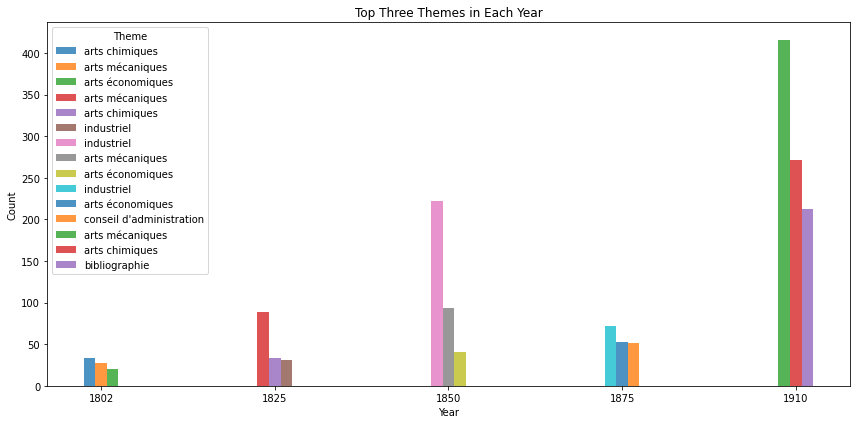

In [0]:
# Step 5: Plot the data as a grouped bar chart
plt.figure(figsize=(12, 6))

# Grouped bar chart parameters
bar_width = 0.2
opacity = 0.8

# Get unique years in the dataset
years = sorted(statics_df['year'].unique())

# Iterate over each year and plot the top three themes as grouped bars
for i, year in enumerate(years):
    df_year = statics_df[statics_df['year'] == year].head(3)  # Select top three themes for each year
    x = i * 3  # Calculate the x position for each year
    
    # Plot each theme as a grouped bar
    for j, theme in enumerate(df_year['theme']):
        y = df_year[df_year['theme'] == theme]['count'].values[0]  # Get the count value
        plt.bar(x + j * bar_width, y, bar_width, alpha=opacity, label=theme)

# Set the x-axis labels and tick positions
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Three Themes in Each Year')
plt.xticks([i * 3 + bar_width for i in range(len(years))], years)
plt.legend(title='Theme')
plt.tight_layout()

# Show the modified plot
plt.show()
